# Example of a Complex Environmental System: Predator-Prey Interactions

The competitive Lotka-Volterra equations are a classic example of complexities that arise in even seemingly simple systems with only two state variables: the populations of a predator ($y$) and their prey ($x$). Their populations can be described by the following system of ordinary differential equations:
\begin{align}
\frac{\partial x}{\partial t} = a\Big(1-\frac{x}{K_x}\Big)x - bxy  \\
\frac{\partial y}{\partial t} = cxy - dy
\end{align}
where $a$ is the growth rate of the prey, $K_x$ is its carrying capacity, and $b$ is an interaction parameter describing the effect of the predator population on the prey, while $c$ an interaction parameter describing the effect of the prey population on the predator and $d$ is the death rate of the predator.

In [ ]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

def LotkaVolterra(y0, t, params):
  # Prey parameters
  a = params[0] # prey growth rate
  b = params[1] # effect of predator on prey population
  Kx = params[2] # carrying capacity of prey

  # Predator parameters
  c = params[3] # effect of prey on predator population
  d = params[4] # death rate of predator

  # Initial conditions
  X = y0[0]
  Y = y0[1]

  # Differential equations
  dX = a*X*(1-X/Kx) - b*X*Y
  dY = c*X*Y - d*Y

  return [dX, dY]

# solve ODE for a set of parameters over 150 time steps
params = [1, 0.02, 100, 0.02, 0.25]
time = np.arange(0,150)
y0 = [80, 20] # initial populations of prey, predator
soln = integrate.odeint(LotkaVolterra, y0, time, args=(params,))

Plot the simulated predator and prey populations

In [ ]:
# plot modeled predator and prey populations
fig, ax = plt.subplots()
ln1 = ax.plot(soln[:,0],label="Prey",color="black")
ax.tick_params(labelsize=14)
ax.set_ylabel("Prey Population",fontsize=16)
ax.set_xlabel("Time",fontsize=16)
ax2 = ax.twinx()
ln2 = ax2.plot(soln[:,1],label="Predator",color="tab:red")
ax2.tick_params(labelsize=14)
ax2.set_ylabel("Predator Population",fontsize=16)
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize=16, loc="upper right")
fig.show()

This is a point attractor - it leads to a single steady state population of the predator and the prey. Let's make this model dimensionless and then look at what other dynamics can emerge with different parameters based on the figure below.


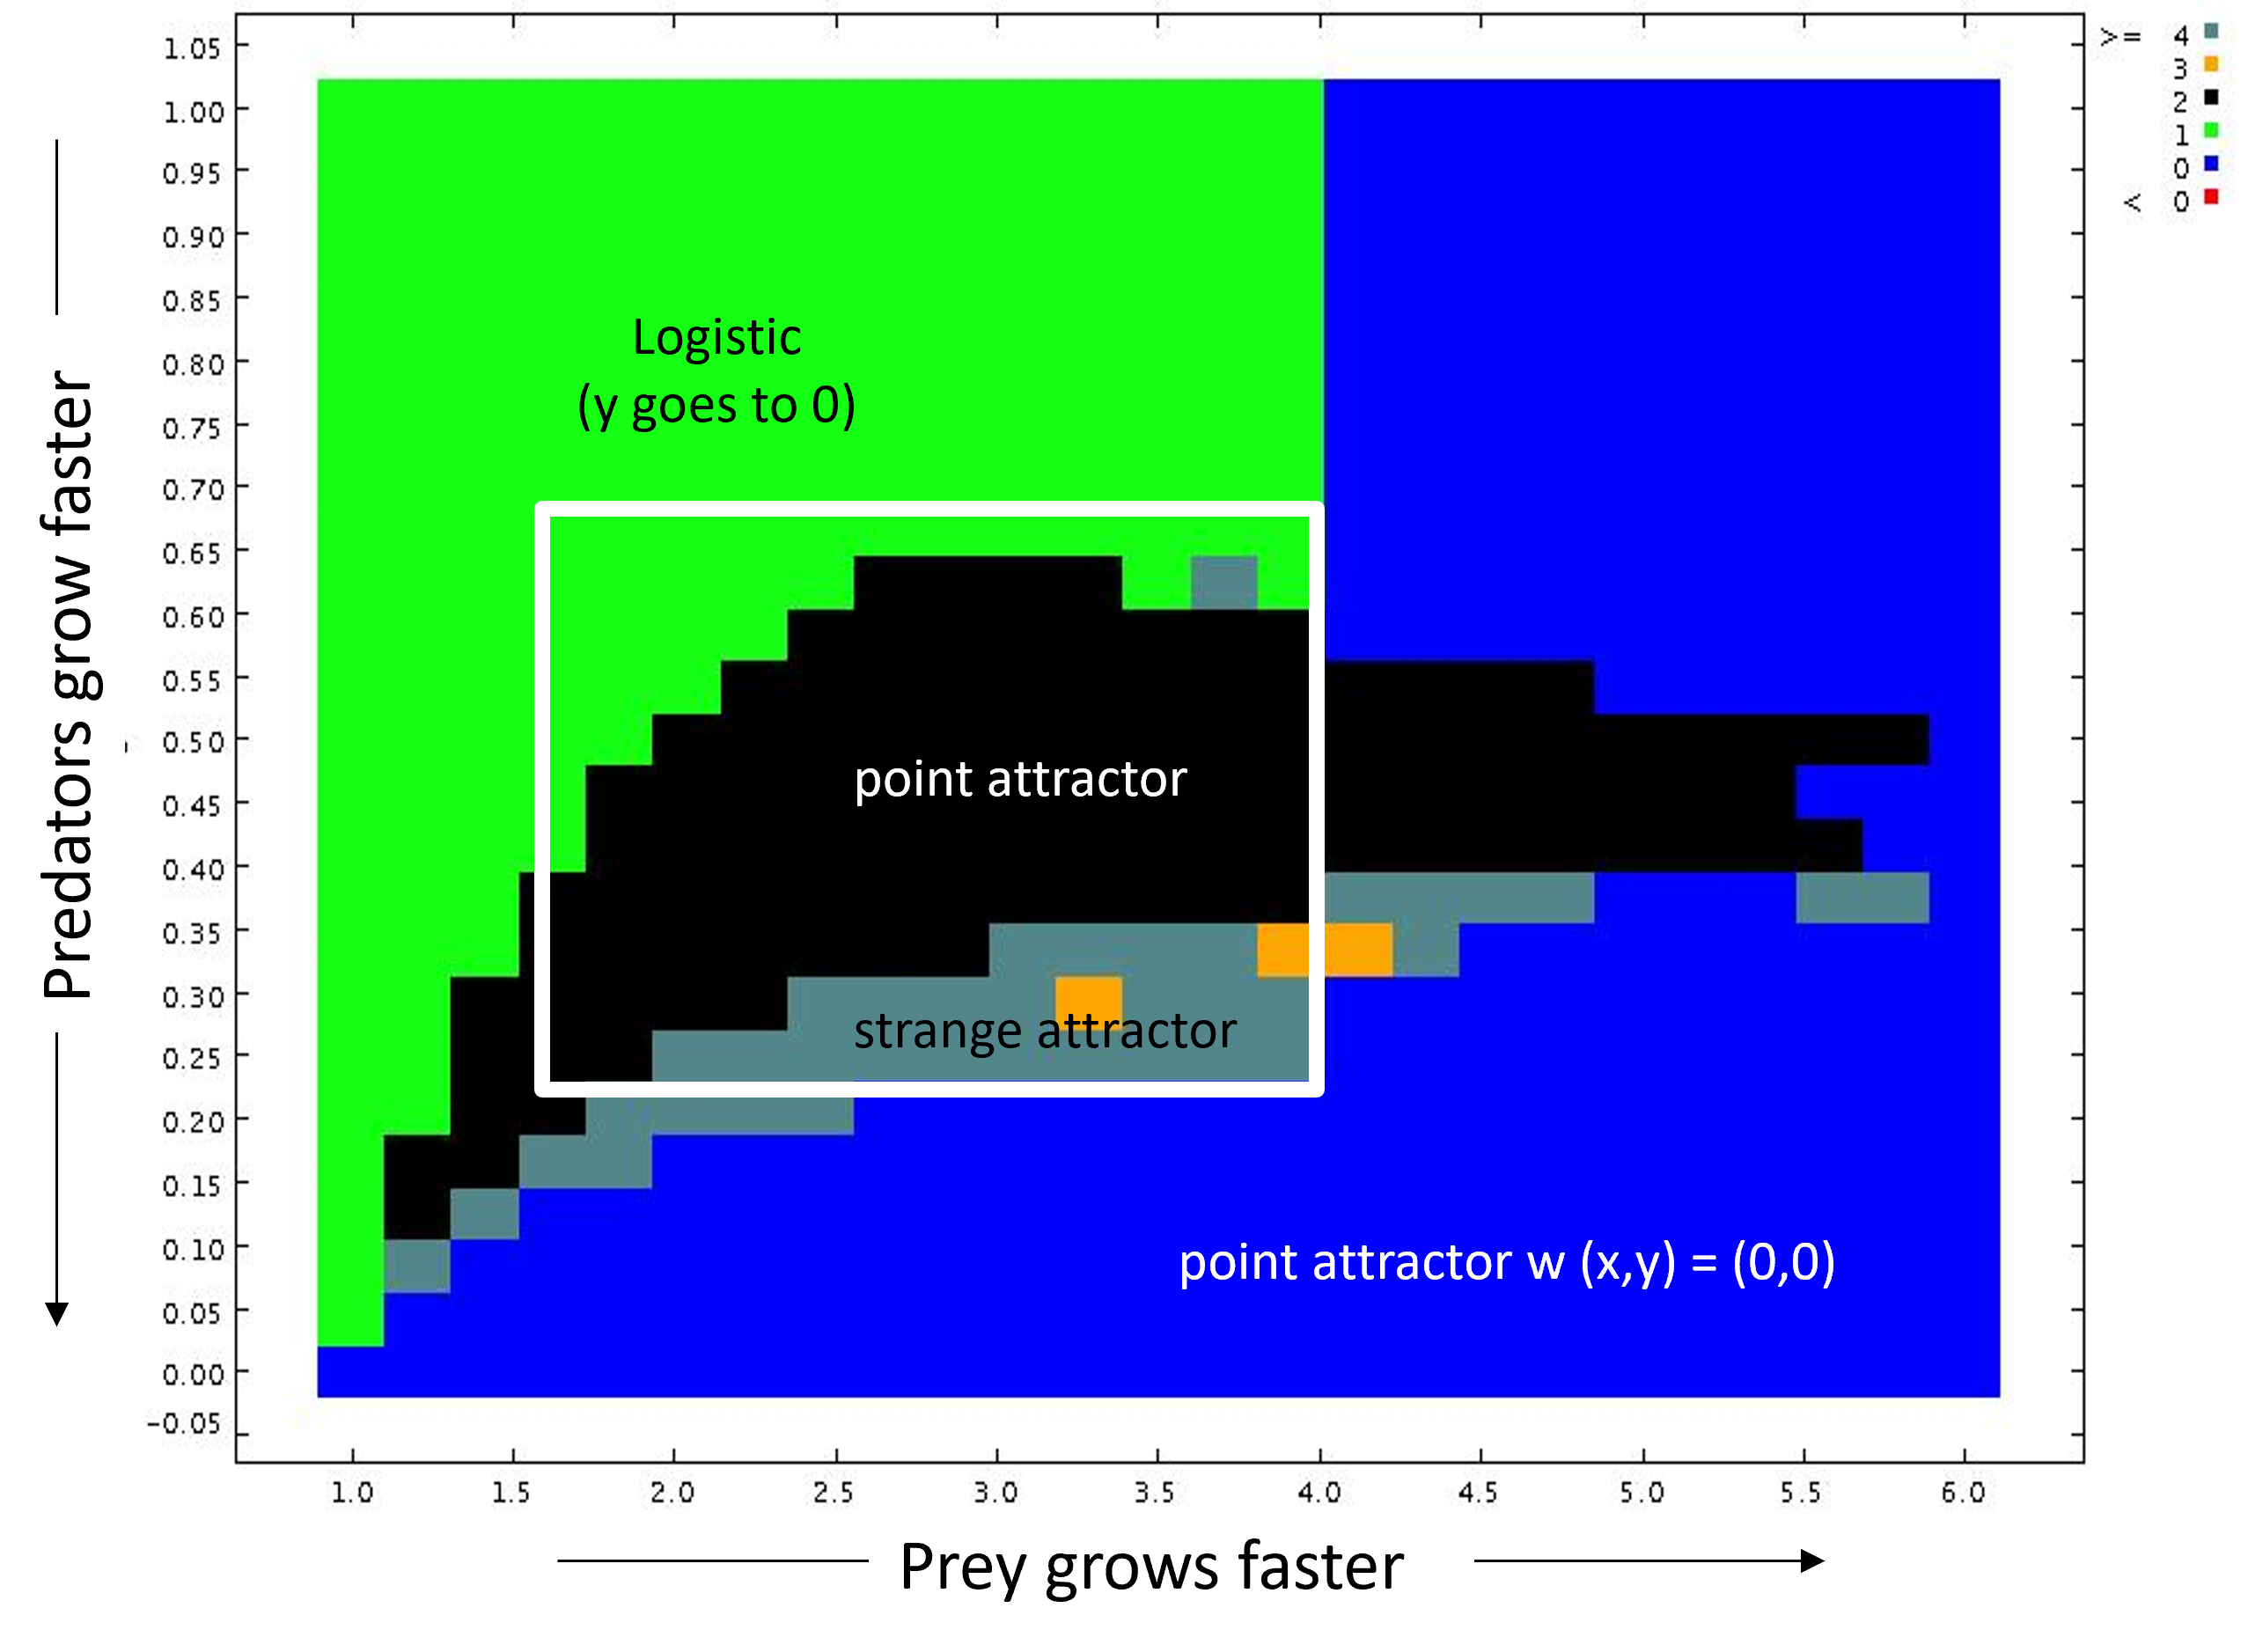

In [ ]:
def LotkaVolterraNoDim(y0, t, params):
  # Parameters
  alpha = params[0]
  beta = params[1]

  # Initial conditions
  X = np.empty([len(t)+1])
  Y = np.empty([len(t)+1])

  # Differential equations
  X[0] = y0[0]
  Y[0] = y0[1]
  for i in range(len(t)):
    X[t+1] = alpha*X[t]*(1-X[t]) - X[t]*Y[t]
    Y[t+1] = X[t]*Y[t]/beta

  return [X,Y]

Parameter values in green region of figure: predator population goes to 0

In [ ]:
# solve ODE for a set of parameters over 150 time steps
# Parameter values in green region of figure
params = [1.75, 0.6]
time = np.arange(0,150)
y0 = [0.48, 0.26] # initial populations of prey, predator
soln = LotkaVolterraNoDim(y0, time, params)

# plot modeled predator and prey populations
fig, ax = plt.subplots()
ln1 = ax.plot(soln[0],label="Prey",color="black")
ax.tick_params(labelsize=14)
ax.set_ylabel("Prey Population",fontsize=16)
ax.set_xlabel("Time",fontsize=16)
ax2 = ax.twinx()
ln2 = ax2.plot(soln[1],label="Predator",color="tab:red")
ax2.tick_params(labelsize=14)
ax2.set_ylabel("Predator Population",fontsize=16)
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize=16, loc="upper right")
fig.show()

Parameter values in the blue/gray region: strange attractor/limit cycles.

In [ ]:
# solve ODE for a set of parameters over 30 time steps
# Parameter values in blue region of figure
params = [3.75, 0.3]
time = np.arange(0,30)
y0 = [0.48, 0.26] # initial populations of prey, predator
soln = LotkaVolterraNoDim(y0, time, params)
#soln = integrate.odeint(LotkaVolterraNoDimODE, y0, time, args=(params,))

# plot modeled predator and prey populations
fig, ax = plt.subplots()
ln1 = ax.plot(soln[0],label="Prey",color="black")
ax.tick_params(labelsize=14)
ax.set_ylabel("Prey Population",fontsize=16)
ax.set_xlabel("Time",fontsize=16)
ax2 = ax.twinx()
ln2 = ax2.plot(soln[1],label="Predator",color="tab:red")
ax2.tick_params(labelsize=14)
ax2.set_ylabel("Predator Population",fontsize=16)
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize=16, loc="upper right")
fig.show()

Parameter values in the black region: point attractor

In [ ]:
# solve ODE for a set of parameters over 30 time steps
# Parameter values in blue region of figure
params = [2.75, 0.45]
time = np.arange(0,30)
y0 = [0.48, 0.26] # initial populations of prey, predator
soln = LotkaVolterraNoDim(y0, time, params)
#soln = integrate.odeint(LotkaVolterraNoDimODE, y0, time, args=(params,))

# plot modeled predator and prey populations
fig, ax = plt.subplots()
ln1 = ax.plot(soln[0],label="Prey",color="black")
ax.tick_params(labelsize=14)
ax.set_ylabel("Prey Population",fontsize=16)
ax.set_xlabel("Time",fontsize=16)
ax2 = ax.twinx()
ln2 = ax2.plot(soln[1],label="Predator",color="tab:red")
ax2.tick_params(labelsize=14)
ax2.set_ylabel("Predator Population",fontsize=16)
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize=16, loc="upper right")
fig.show()